This research focuses on evaluating the performance of two distinct approaches, Classical Methods and NN, in solving Quadratic optimization challenges. The study necessitated the generation of model-specific data as detailed below:

Initially, we examine a mixed model from a uniform distribution:


$y = \sum_{d=1}^{D} \pi_d U_d(d-1, d)$



Here, $\pi = \{\pi_d \in \mathbb{R}^+\}_{d=1}^{D} $ denotes the mixing coefficients, which are constrained by the conditions $\sum_{d=1 }^{D} \pi_d = 1$ and $\pi \leq 1$. The symbol $U$ represents random samples drawn from a uniform distribution $\in \mathbb{R}^{DxN})$. The variable $D$ signifies the total number of components in the mixture, and $y$ represents the outcome of this mixture.

Here, $\pi = \{\pi_d \in \mathbb{R}^+\}_{d=1}^{D} $  denotes the mixing coefficients, which are constrained by the conditions $\sum_{d=1 }^{D} \pi_d = 1$ and $(\pi \geq 0)$. The symbol $U$ represents random samples drawn from a uniform distribution.

Then, the following optimization problem arises:

$min_{\hat{\pi}} \quad ||y - \hat{\pi}U||$

${s.t} \quad \sum_{d}^{D} \hat{\pi_d} = 1 $


$0 \leq \pi_d \leq 1$



Fugure presents a summary of the problem analyzed in this section to enhance understanding of the optimization program we are addressing.
A set of five components $(D=5)$ was chosen with the aim of generating data. The selection of these elements was conducted randomly, ensuring they met the constraints imposed by the optimization problem. Using this set, 500 instances $(N=500)$ were created. Subsequently, one hundred iterative experiments were conducted to investigate the stability and diversity of the outcomes derived from solving these constrained QP problems.


The second issue addressed is an iterative QP problem in dynamic ecological contexts, particularly in those characterized by behavior bordering on chaos, posing a significant challenge. The focus is on analyzing the population dynamics of adult flies through the differential equation presented below:

$M_{t+1} = RM_{t-\tau }\exp\left( \frac{M_{t-\tau}}{M_0} \right) + M_t \exp(\gamma)$


Here, $M_{t+1}$ denotes the amount measured in time $t + 1$, modeled by previous observations $M_t$ and $M _{t-\tau}$, $\exp(\gamma)$ holds a noise integration or disturbance constant in the model, and $R$ represents a constant indicating amplitude.


Contrary to the prior scenario, the optimization problem in this exercise requires a few modifications, as follows:

$y_{t}=M_{t+1}=w_{0}M_{t}+w_{1}M_{t-1}+w_{2}M_{t-2}+...+ w_aM_{t-a}$
$w_{0}=exp(\gamma)$
$w_{1}=w_{2}=\cdots=w_{a-1}=0$
$w_{a}= Rexp(-M_{t-a}/M_{0})e_{t}$


For a =1:
$w=\left\{w_i \in \mathbb{R} \right\}^{2}_{i}\in \mathbf{R}^{2x1}$
$x=\left\{x_j, x_{j-1}\right\} \in \mathbf{R}^{1x2}$


$y_{t} = M_{t+1} = w_{0}M_{t} + w_{1}M_{t-1}$
$y_{t} =
$M_{t} & M_{t-1}$

$w_{0}$
$w_{1}$

$y_{t} = x_{t} w$

In this sense, the following cost is employed:

$\min_{w} \quad ||y_t - x_tw||$






Specifically, the variables conformed to the distributions: $(R \sim \mathcal{N}(2, 2^2))$, $(\gamma \sim \mathcal{N}(-1.8,0.4^2))$, $(N_0 \sim \mathcal{N}(6,0.5^2))$. Using these parameters, a series of 500 values was constructed. At each timestep, the competing strategies were tasked with solving an optimization problem to determine the specific model parameters $w$ at that moment. This process was replicated 100 times.

## Libraries and data

In [ ]:

from google.colab import drive
from tensorflow.python.ops.nn_ops import softmax
from keras import backend as k
import numpy as np
from matplotlib.gridspec import GridSpec
from IPython import display
from scipy.optimize import linprog
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import numpy as np
import matplotlib. pyplot as plt
from keras.layers import Activation,Dense,Input,BatchNormalization,Dropout,Conv1D,Flatten,MaxPool1D,Dot,Reshape,Conv2D,Concatenate,ReLU,Lambda,MaxPooling2D,Normalization
import cvxpy as cp
import tensorflow as tf
from keras import Model
from IPython import display
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import warnings
import pandas as pd
from IPython import display
path='/content/drive/MyDrive/Maestría/Optimización/Data/'
from keras.models import Sequential
mse=mean_squared_error
mae=mean_absolute_error
mape=mean_absolute_percentage_error
warnings.filterwarnings("ignore")
drive.mount('/content/drive')
import pandas as pd
import scipy.io as sio
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.callbacks import Callback
from typing import Tuple
import os
os.chdir('/content/drive/Shareddrives/red_gas_col/Prueba')
from My_Functions.Object1 import Evaluate,FlyEvaluate


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Evaluate class

  Comparison of Results in the Toy Problem: The chart included in the graph
shows the MAPE measurement outcomes concerning the output $L(y_n,\hat{y}_n)$, displayed on
the left side of the graph, and regarding the parameters $L(w_n, \hat{w}_n)$, positioned on the right.
The letter S denotes the solver, whereas NN stands for the proposed neural network. The
numbers indicate the noise level, and the letter N within parentheses signifies its absence.




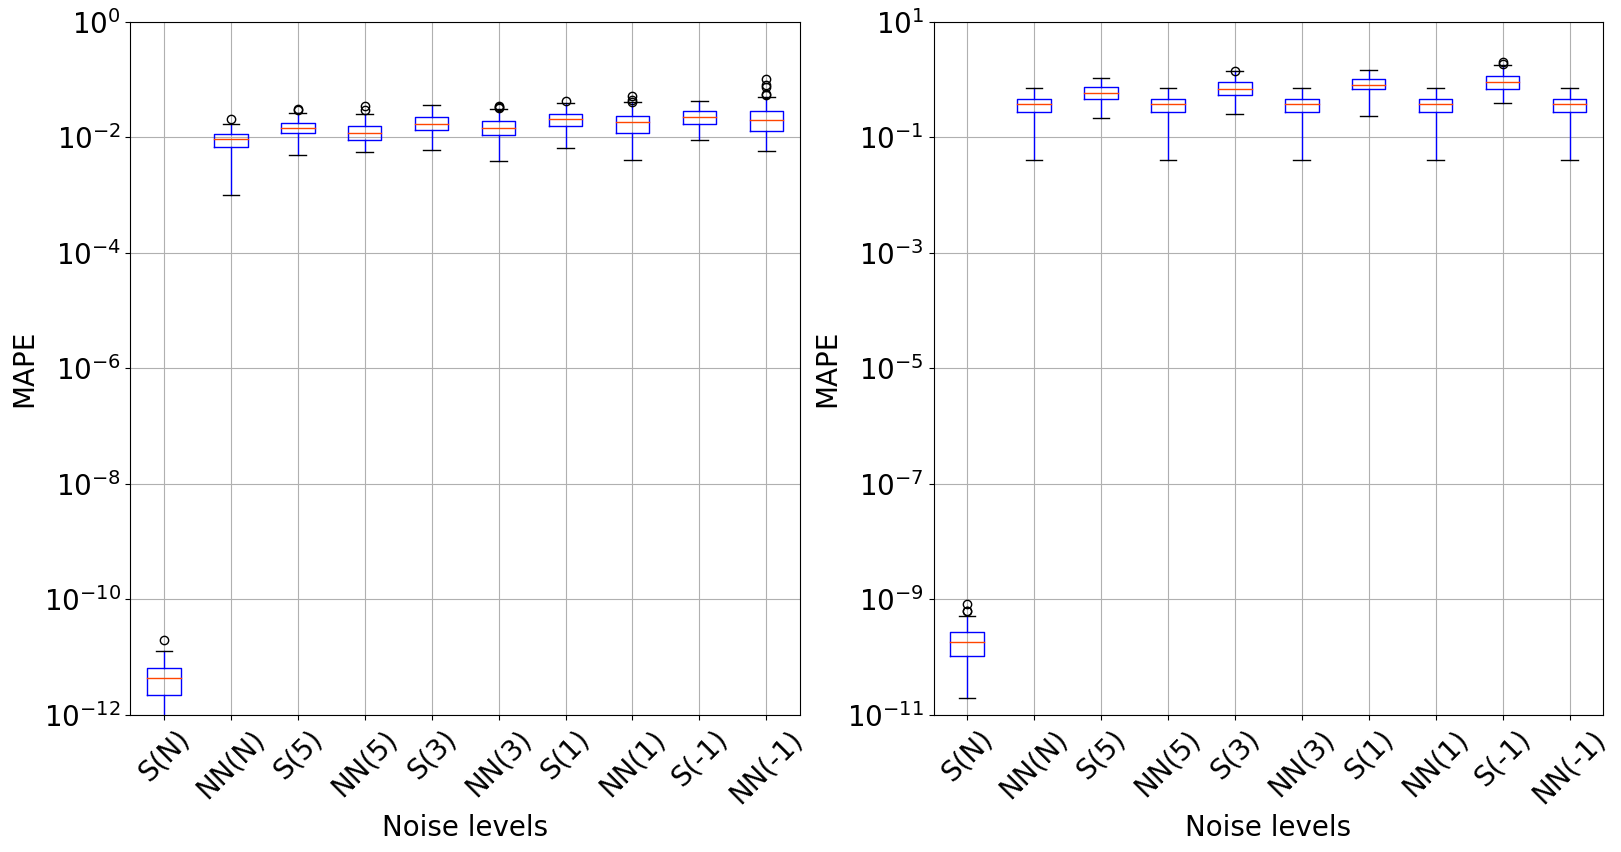

In [ ]:
ev = Evaluate()
ev.plot('SCS','/content/drive/Shareddrives/red_gas_col/Prueba/Data/')

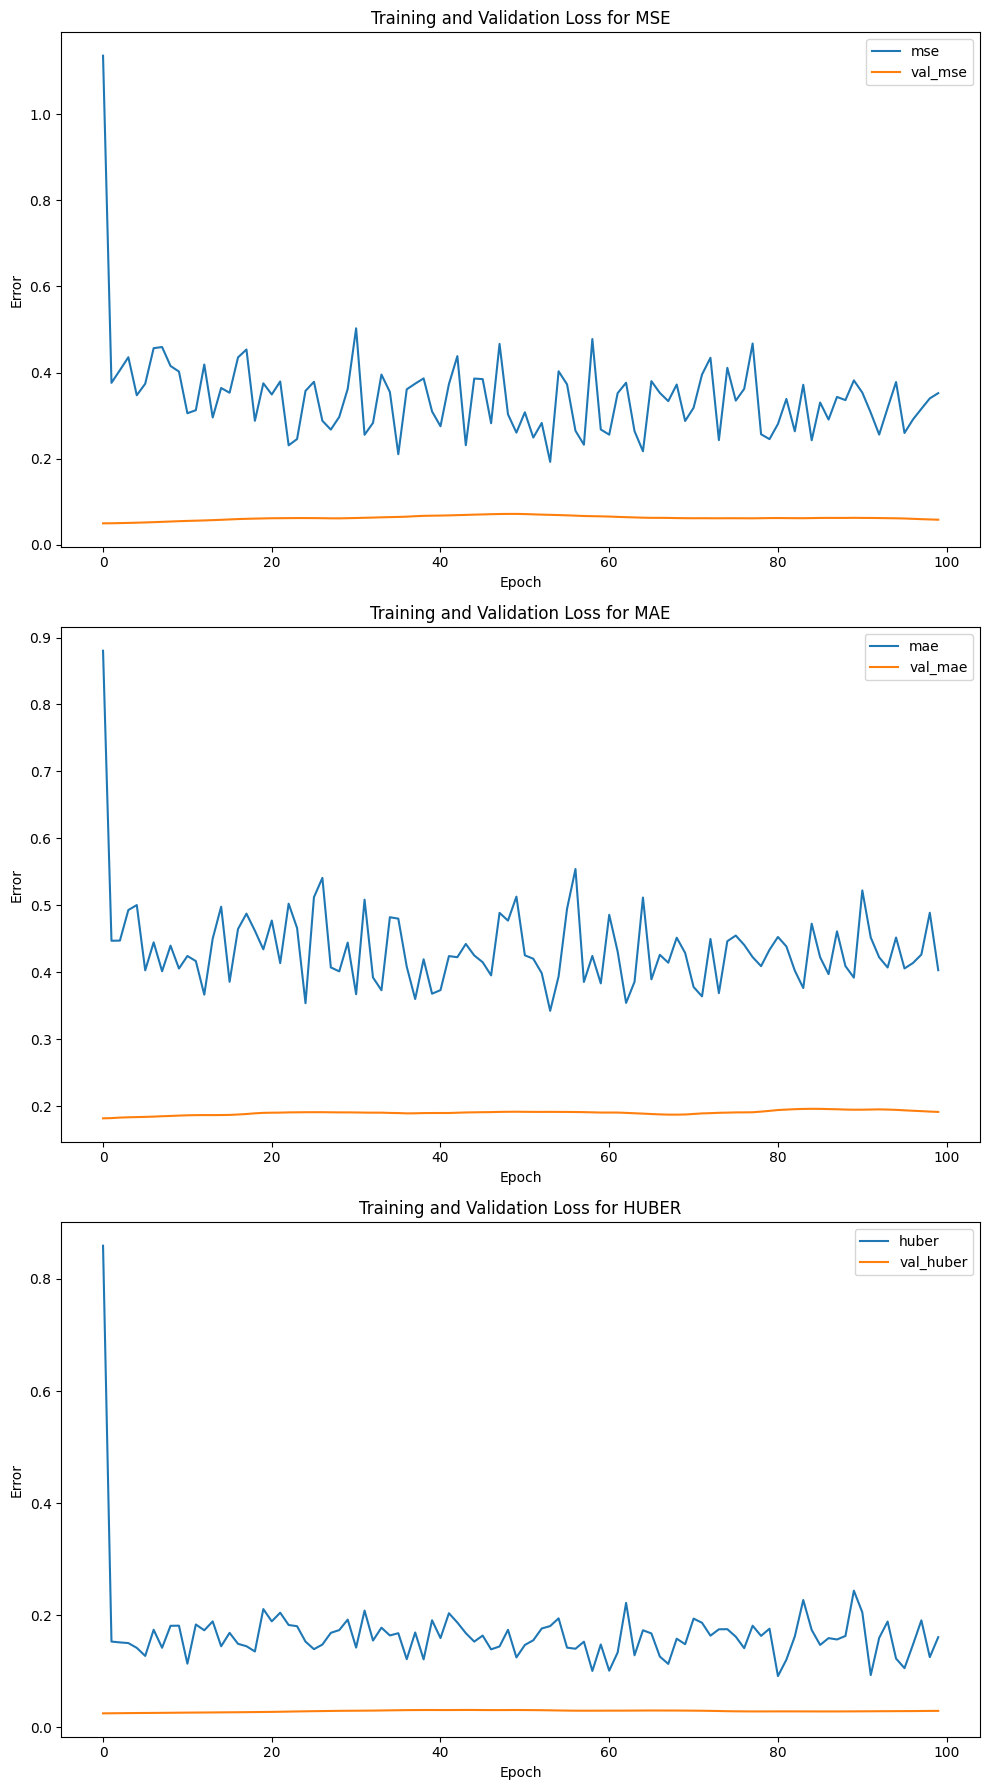

In [ ]:

a=ev.history_plot()

## FlyEvaluate class

Results comparison in the real-world problem: The box plot on the graph demonstrates the \gls*{mape} measurement results in terms of output $L(y_n,\hat{y}_n)$ on the left graph, and in relation to the parameters $L(w_n,\hat{w}_n)$ on the right. NN signifies the errors linked to our proposal, while the names on the x-axis represent the solver used for comparison.

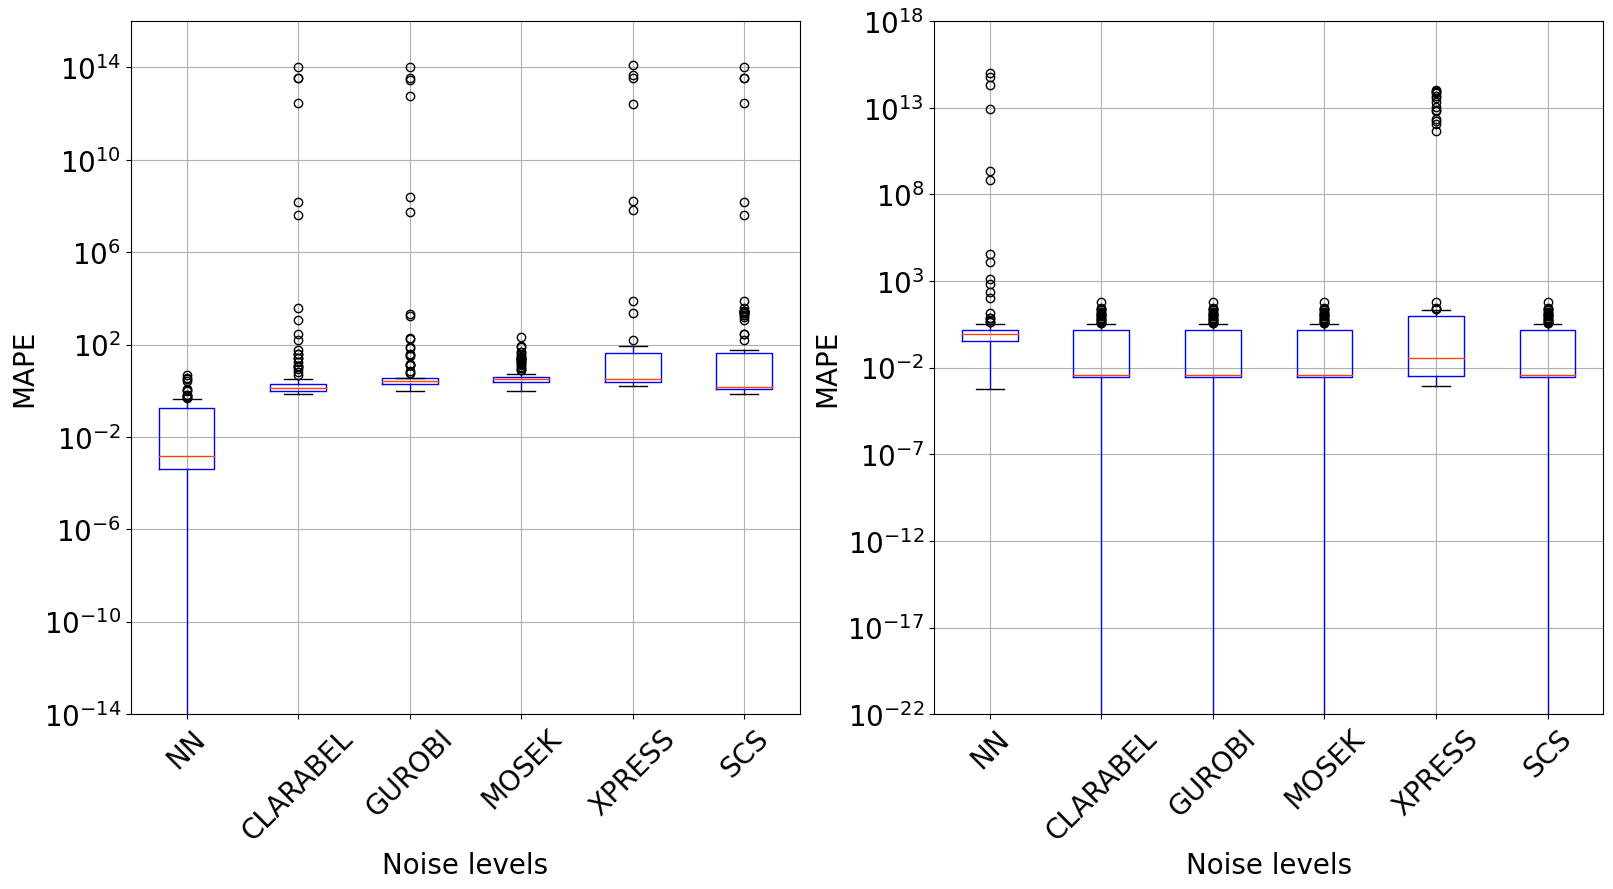

In [ ]:
FlyEvaluate().plot_results('/content/drive/Shareddrives/red_gas_col/Prueba/Data/')

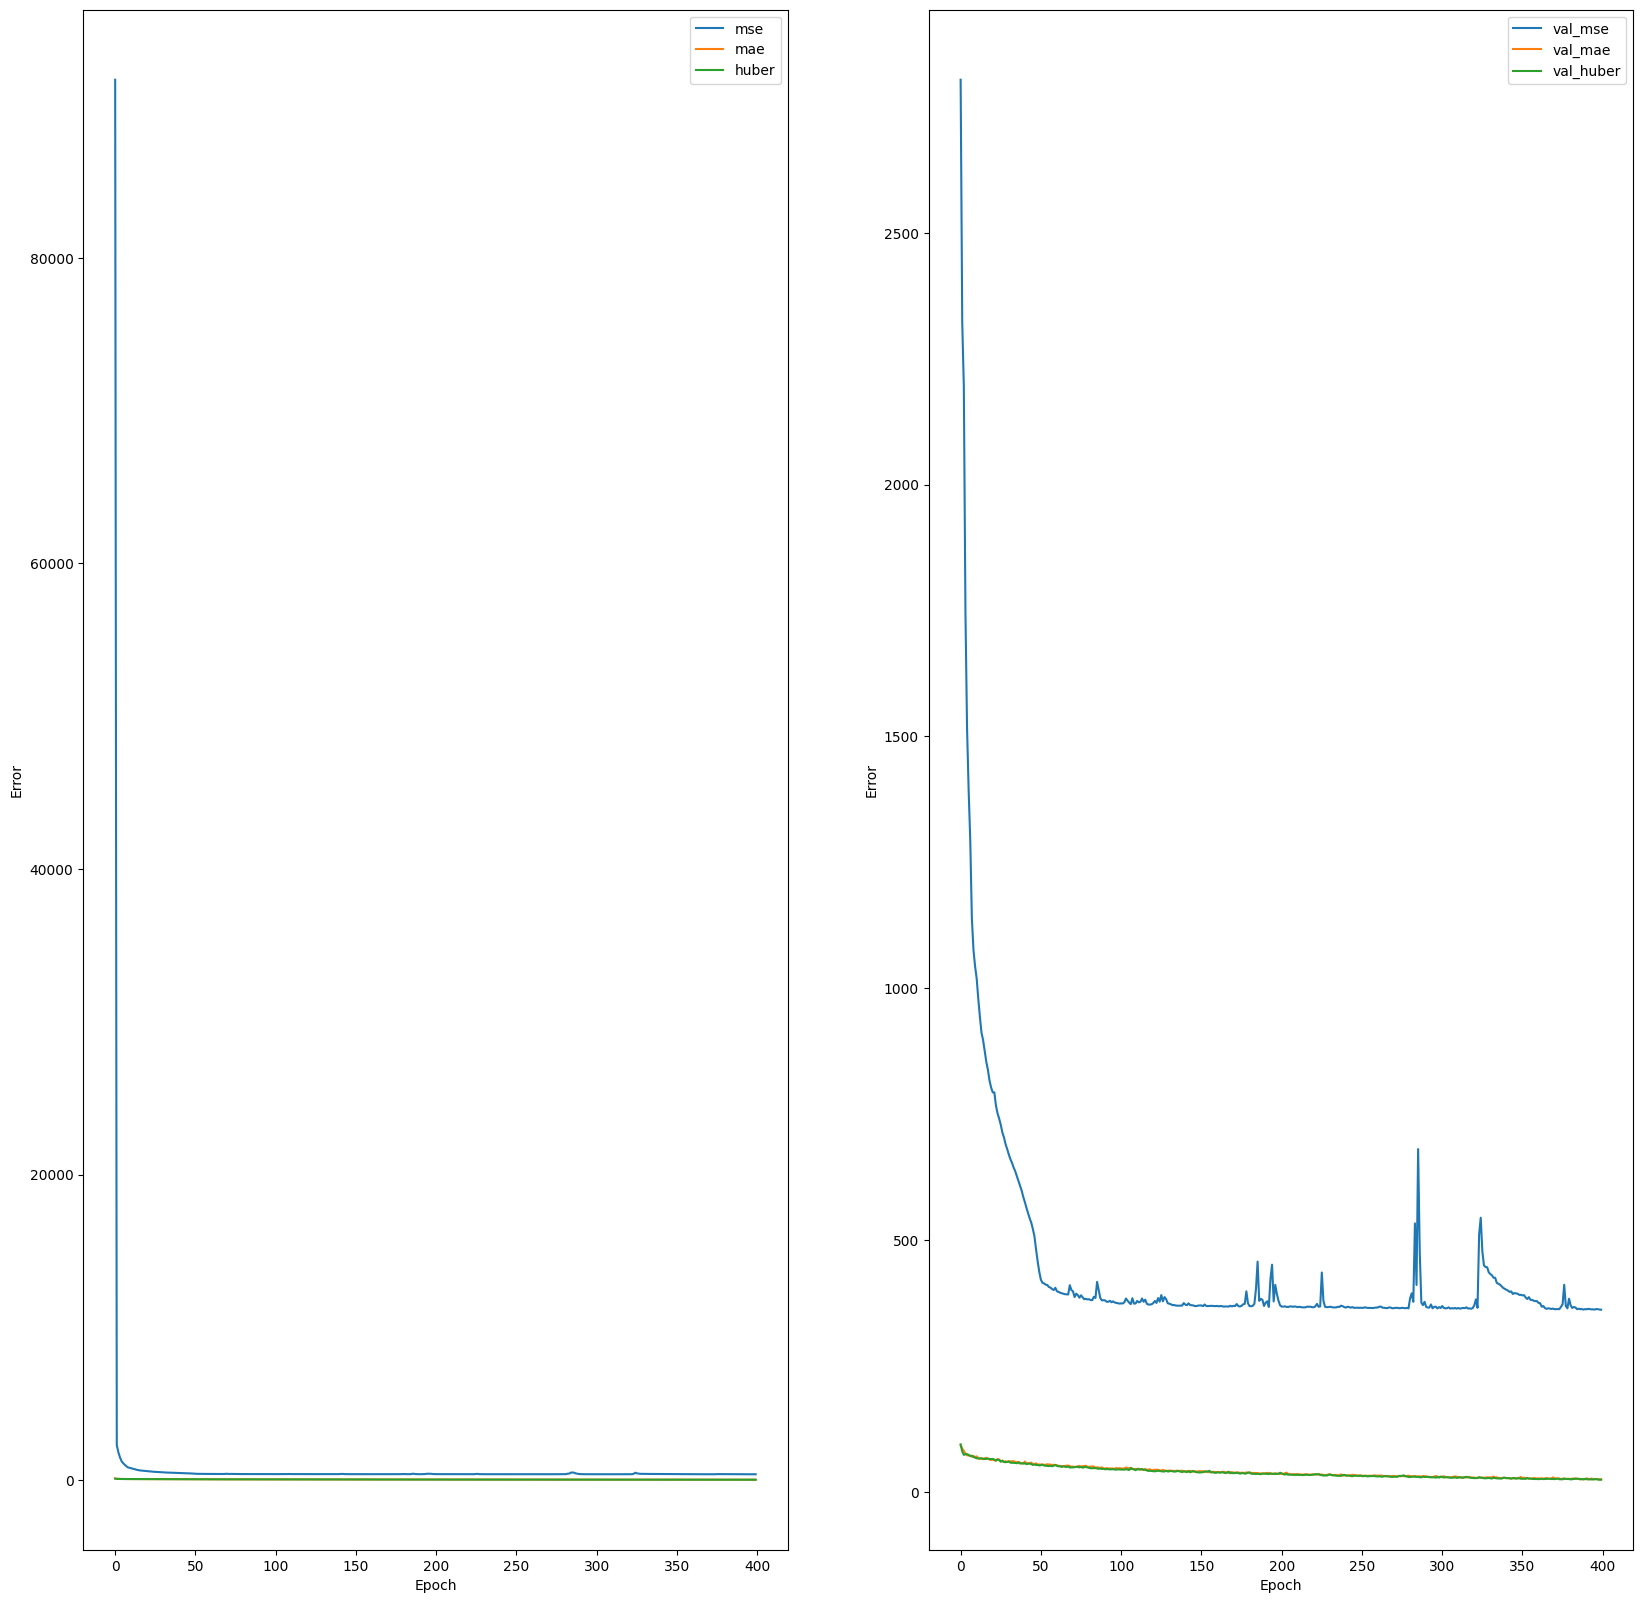

,loss,val_loss
0,93.839294,94.559898
1,79.881454,80.376984
2,73.777145,73.615318
3,71.493401,75.027817
4,71.845512,75.161636
...,...,...
395,24.291451,25.437006
396,24.208254,25.568342
397,23.941710,24.580587
398,23.445641,24.334742


In [ ]:
FlyEvaluate().history_plot_loss('/content/drive/Shareddrives/red_gas_col/Prueba/Data/')